In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read the data and load it in a df
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
hdi = pd.read_csv('./hdi.csv')

In [2]:
#starting data (first 5 rows)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## In which country do people have the most career satisfaction

In [3]:
#drop rows with missing HomeRemote values & rows where country = 'I prefer not to say'
df_drop_careersatisfaction=df.dropna(subset=["CareerSatisfaction"],axis=0)
df_drop_final = df_drop_careersatisfaction.drop(df_drop_careersatisfaction[df_drop_careersatisfaction['Country'] == 'I prefer not to say'].index)
df_drop_final

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [4]:
# create new df where only Country and CareerSatisfaction info are kept
new_df_careersatisfaction = df_drop_final[['Country', 'CareerSatisfaction']]
new_df_careersatisfaction

,Country,CareerSatisfaction
2,United Kingdom,8.0
3,United States,6.0
4,Switzerland,6.0
6,United States,7.0
7,Poland,7.0
...,...,...
51386,Romania,7.0
51387,United States,7.0
51389,Canada,10.0
51390,United States,6.0


In [5]:
pd.set_option('display.max_rows', None)
#Group by country, calculate CareerSatisfaction mean score for each country, and sort them out
series3=new_df_careersatisfaction.groupby(['Country']).mean()['CareerSatisfaction'].sort_values()
mean_careersatisfaction_df=series3.to_frame()
mean_careersatisfaction_df

,CareerSatisfaction
Country,
American Samoa,0.000000
Saint Lucia,0.000000
Bhutan,1.000000
Martinique (French),2.000000
U.S. Minor Outlying Islands,3.000000
Brunei Darussalam,3.000000
Libya,3.000000
French Guyana,3.000000
Eritrea,3.500000


## List of countries with very high HDI

In [6]:
#drop rows with missing hdicode values
hdi_drop=hdi.dropna(subset=["hdicode"],axis=0)

#only keep rows where hdicode is very high
    # Create a boolean series
boolean_series = hdi_drop['hdicode'] == 'Very High'
    # Use the boolean series as a filter on the DataFrame using .loc
hdi_drop_final = hdi_drop.loc[boolean_series]

#converts df with countries with hdicode- 'Very high' to a list
country_list = hdi_drop_final['country'].tolist()
country_list

['Andorra',
 'United Arab Emirates',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bahrain',
 'Bahamas',
 'Belarus',
 'Brunei Darussalam',
 'Canada',
 'Switzerland',
 'Chile',
 'Costa Rica',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Georgia',
 'Greece',
 'Hong Kong, China (SAR)',
 'Croatia',
 'Hungary',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea (Republic of)',
 'Kuwait',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Malta',
 'Montenegro',
 'Mauritius',
 'Malaysia',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Oman',
 'Panama',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Uruguay',
 'United States']

## In which country with very high HDI do people have the most career satisfaction

In [7]:
#only keep rows for countries with very high HDI
filtered_mean_careersatisfaction_df = mean_careersatisfaction_df[mean_careersatisfaction_df.index.isin(country_list)]
filtered_mean_careersatisfaction_df

,CareerSatisfaction
Country,
Brunei Darussalam,3.000000
Japan,6.244240
Liechtenstein,6.333333
Mauritius,6.363636
Georgia,6.583333
Italy,6.718069
Turkey,6.735395
Kazakhstan,6.740741
Singapore,6.819549


In [8]:
#remove rows/countries with CareerSatisfaction score below 7
filtered_mean_careersatisfaction_cutoff_df = filtered_mean_careersatisfaction_df[filtered_mean_careersatisfaction_df["CareerSatisfaction"]>7]
filtered_mean_careersatisfaction_cutoff_df

,CareerSatisfaction
Country,
Russian Federation,7.005298
United Arab Emirates,7.023256
Montenegro,7.090909
Portugal,7.115385
Belarus,7.138889
Germany,7.139929
Belgium,7.153409
Ireland,7.166113
France,7.181688


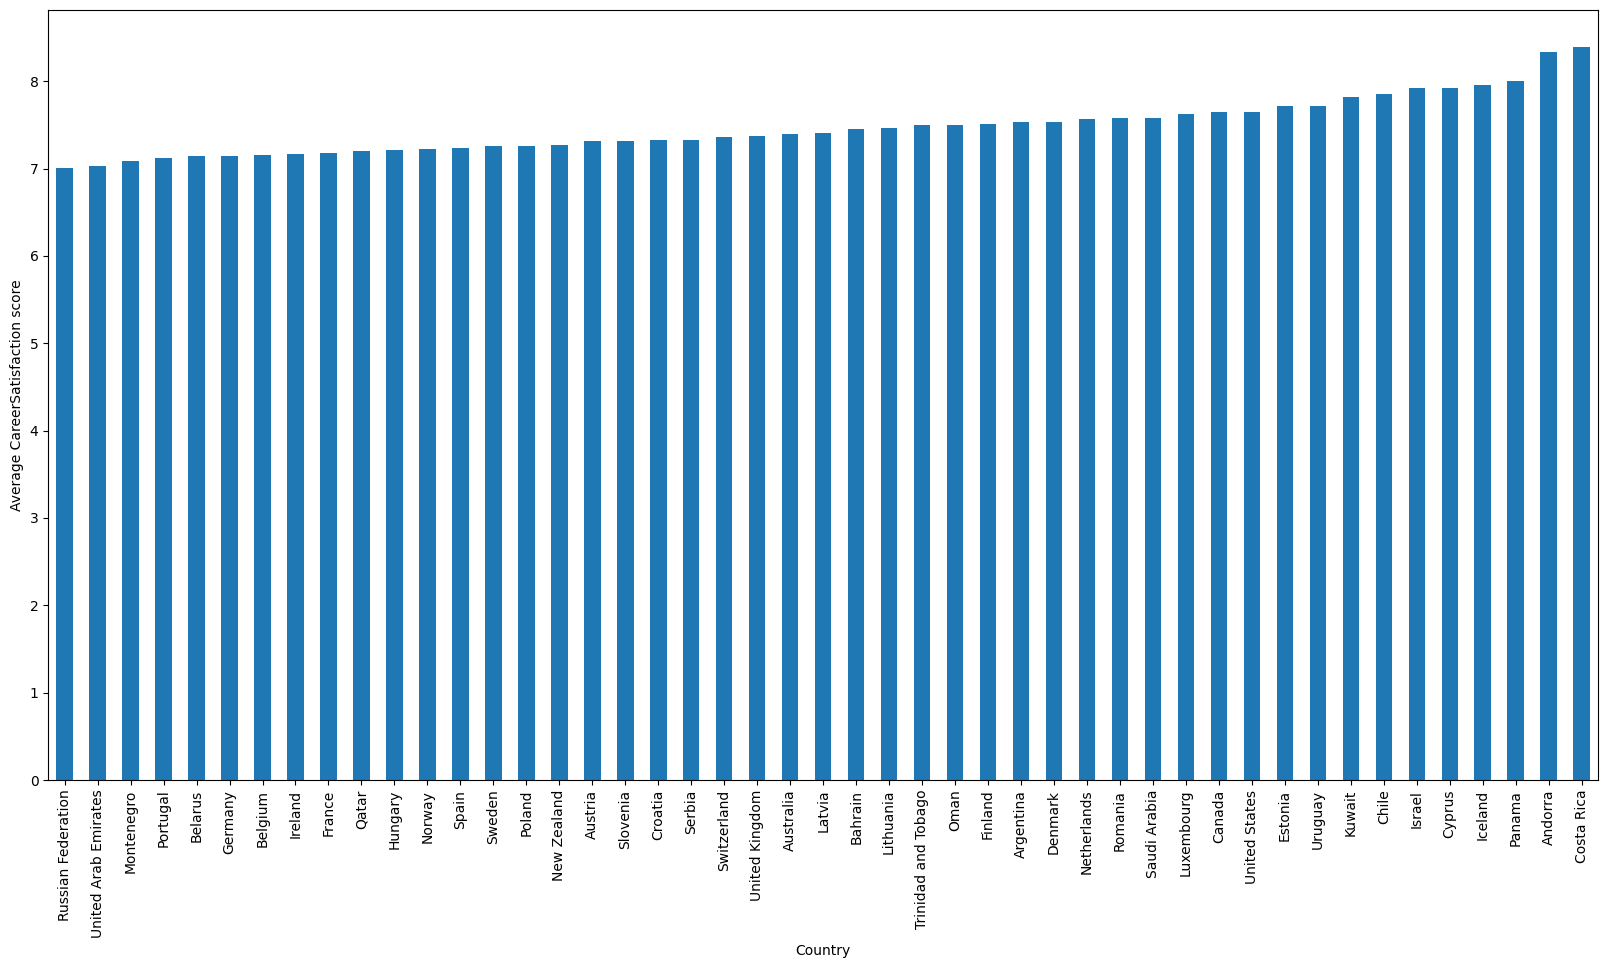

In [9]:
# plot Avergae Career Satisfaction per country (only for countries with very high HDI where career staisfaction is >= 7/10)
filtered_mean_careersatisfaction_cutoff_df.plot.bar(legend=None, figsize=(20,10))
plt.xlabel("Country")
plt.ylabel("Average CareerSatisfaction score")
plt.show()